<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/K_Means_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import math
%matplotlib inline

X,Y = load_iris(return_X_y=True)

In [63]:
!python3 --version

Python 3.6.9


In [82]:
class K_Means():
    def __init__(self, k,elbow=False):
        self.k = k
        self.elbow_flag = elbow
        self.k_centroids = None

    def final_centroids(self):
        return np.array(self.k_centroids)

    def euclidean_distance(self, p1, p2):
        # math.dist can gives distance between points of any dimensionality 
        # Unfortunately Colab works on python3.6 and dist is in 3.8
        #return math.dist(p1,p2)     
        return np.linalg.norm(p1-p2)

    def get_centroids(self,X,y,k):
        k_centroids = []
        cluster_indexes = []
        for j in range(k):
            cluster_indexes.append([i for i in range(len(y)) if y[i] == j])
        # Finding means of all the clusters
        # Summing all the coordinates in all the dimensions having same cluster 
        # label and taking a mean
        for cluster in cluster_indexes:
            cluster_mean = 0
            for i in cluster:
                 cluster_mean += X[i]
            k_centroids.append(np.array(cluster_mean/len(cluster)))
            
            # k = number of clusters and their labels as well.
            # Taking mean of all the points having same cluster label 
            # To get the mean coordinates find the mean of all the dimensional coordinates
            # E.g -> [x,y,z] otherwise mean will be a number and for distance dims must be equal
            # experession below will give direct mean instead of coordinates.
        # k_centroids.append((np.mean([point for point,cluster in zip(X,y) if cluster == j])))
        return k_centroids

    def cluster(self,X,k_centroids):
        y = np.zeros(len(X),dtype=int)
        min_dist = None
        cluster = 0
        dist = None
        for i in range(len(X)):
            min_dist = self.euclidean_distance(X[i],k_centroids[0])
            cluster = 0
            for j in range(len(k_centroids)):
                dist = self.euclidean_distance(X[i],k_centroids[j])
                if dist < min_dist:
                    min_dist = dist
                    cluster = j
            y[i] = int(cluster)
        return y

    def fit(self, X):
        y = np.zeros(len(X),dtype=int)
        k_centroids = []
        #k_means = np.zeros(self.k)
        #clusters = np.zeros(len(X))

        # intializes distinct random k points from dataset
        while True:
            rand_points = np.random.randint(len(X),size=(self.k))
            if len(set(rand_points)) == len(rand_points):
                break
        for points in rand_points:
            k_centroids.append(X[points])
        
        check_count = 0
        # Clustering Loop
        while True:
            check_count += 1
            # Prevents the loop from going to infinity in any possible case
            if check_count > len(X):
                raise Exception("Error in Cluster Loop. Infite Looping.") 
            
            y = self.cluster(X,k_centroids) 
            new_centroids = self.get_centroids(X,y,self.k)
            if np.array_equal(k_centroids,new_centroids):
                self.k_centroids = k_centroids
                return y
                break
            else:
                k_centroids = new_centroids


In [83]:
clf = K_Means(3)
y_pred = clf.fit(X)

In [86]:
k_centroids = clf.final_centroids()

In [84]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [87]:
df = pd.DataFrame(X)

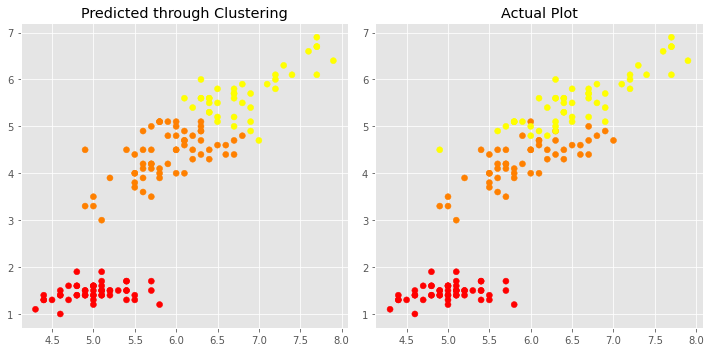

In [102]:
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].scatter(df[0],df[2],c=y_pred,cmap='autumn')
axes[1].scatter(df[0],df[2],c=Y,cmap='autumn')
axes[0].title.set_text("Predicted through Clustering")
axes[1].title.set_text("Actual Plot")
fig.tight_layout()